Sources:



*   https://github.com/AlexeyAB/darknet
*   https://colab.research.google.com/drive/1_GdoqCJWXsChrOiY8sZMr_zbr_fH-0Fg


In [ ]:
# clone darknet repository
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14691, done.
remote: Total 14691 (delta 0), reused 0 (delta 0), pack-reused 14691
Receiving objects: 100% (14691/14691), 13.27 MiB | 14.56 MiB/s, done.
Resolving deltas: 100% (9995/9995), done.


In [ ]:
# change parameters to speed up detection (GPU has to be enabled!)
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
# build darknet
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [ ]:
# function to show images 
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
# connect to google drive 
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
# create link to access google drive files
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [ ]:
# change directory to save the files in the right place
%cd darknet

/content/darknet


In [ ]:
# upload configuration file
!cp /mydrive/robocup_tiny/yolov4-tiny-obj.cfg ./cfg

In [ ]:
# modify configuration file for performing object detection
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-tiny-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-tiny-obj.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [ ]:
# upload obj.names and obj.data
!cp /mydrive/robocup_tiny/obj.names ./data
!cp /mydrive/robocup_tiny/obj.data  ./data

 CUDA-version: 10010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 

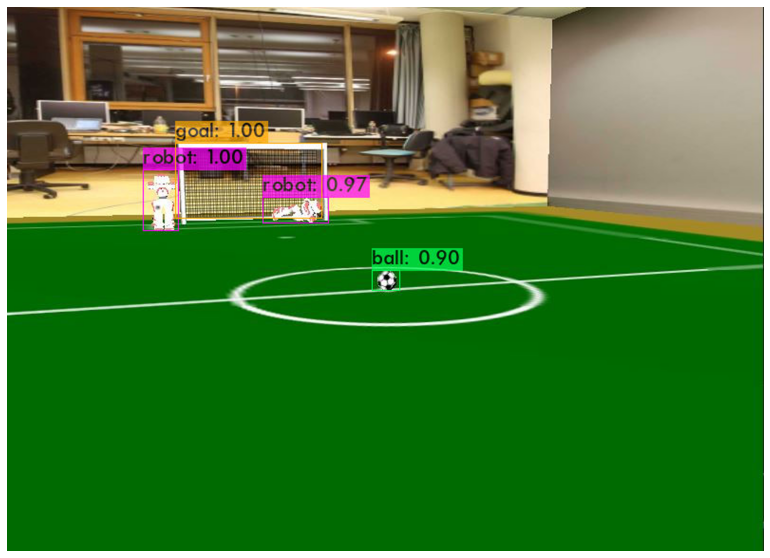

In [ ]:
# object detection on images
!./darknet detector test data/obj.data cfg/yolov4-tiny-obj.cfg /mydrive/robocup_tiny/backup/yolov4-tiny-obj_2000.weights /mydrive/robocup_tiny/image_predictions/13.jpg -thresh 0.8 -dont_show
imShow('predictions.jpg')

 CUDA-version: 10010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 

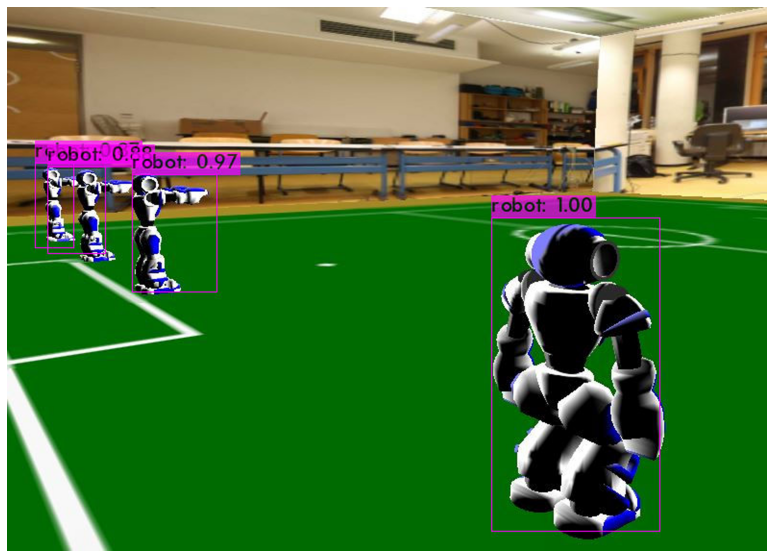

In [ ]:
# object detection on images with coordinates of objects
!./darknet detector test data/obj.data cfg/yolov4-tiny-obj.cfg /mydrive/robocup_tiny/backup/yolov4-tiny-obj_2000.weights /mydrive/robocup_tiny/image_predictions/23.jpg -thresh 0.8 -dont_show -ext_output
imShow('predictions.jpg')

In [ ]:
# object detection on videos
!./darknet detector demo data/obj.data cfg/yolov4-tiny-obj.cfg /mydrive/robocup_tiny/backup/yolov4-tiny-obj_2000.weights /mydrive/robocup_tiny/video_predictions/simspark_simulation.mp4 -thresh 0.9 -dont_show -out_filename res.avi

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
robot: 100% 
robot: 97% 

FPS:26.4 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

goal: 100% 
robot: 100% 
robot: 99% 

FPS:25.6 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

goal: 99% 
robot: 100% 

FPS:25.0 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

goal: 99% 
robot: 100% 

FPS:24.8 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

goal: 100% 
robot: 100% 
robot: 98% 

FPS:24.1 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

goal: 100% 
robot: 100% 
robot: 98% 

FPS:24.4 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

goal: 100% 
robot: 100% 
robot: 97% 

FPS:23.9 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

goal: 100% 
robot: 100% 

FPS:23.8 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

goal: 100% 
robot: 100% 
robot: 98% 

FPS:24.1 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

goal: 100% 
robot: 100% 
robot: 97% 

FPS:23.6 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

goal: 100% 
robot: 100% 
robot: 93% 

FPS:23.5 	 AVG_FPS:30.5

 cvWriteFrame 
Objects:

goal: 100% 
rob